One of my favorite topics in linear algebra is the schur complement.

Matrices behave kind of like numbers. Matrices however are also a grid of numbers. So it is a somewhat natural question to ask about matrices of matrices

A 2x2 matrix can be solved

$$ \begin{bmatrix} a & b \\ c & d \end{bmatrix} = \begin{bmatrix} 1 & 0 \\  & 1 \end{bmatrix} $$ \begin{bmatrix} a & b \\ 0 & d -  \end{bmatrix} = \begin{bmatrix} 1 & 0 \\  & 1 \end{bmatrix} $$

https://en.wikipedia.org/wiki/Kleene_algebra


- domain decomposition
- low rank update. kalman filters. Is low rank update really schur? https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula
- recursvie line of capacitors / resistors. self consistent solution
- supriyo datta scattering. Complex decay from conservative equations.
- effective dynamics. Thevenin equivalents.
- boundary conditions
- Voltage + current -> voltage/current only.

Tropical semirings.
The bones of a calculation

Completion on kleene algebra? Grobner?
ab + c = d


calulating 1 / (1 - A) = 1 + A + A^2 + A^3 + ...
a very similar expression to

bools are a simple kleene algbera. star is almost uninteresting though.
sets of variables. program analysis to fixed point


matrices of bools are relations.

min plus is shortest path

fun with semirings https://dl.acm.org/doi/10.1145/2500365.2500613

https://www.philipzucker.com/bryzzowski_kat/
conway regular semirings

https://nhigham.com/2023/06/01/what-is-the-schur-complement-of-a-matrix/
https://link.springer.com/book/10.1007/b105056 The Schur Complement and Its Applications
strang book
lanczos book


DFA = matrix of strings (regex?) between states




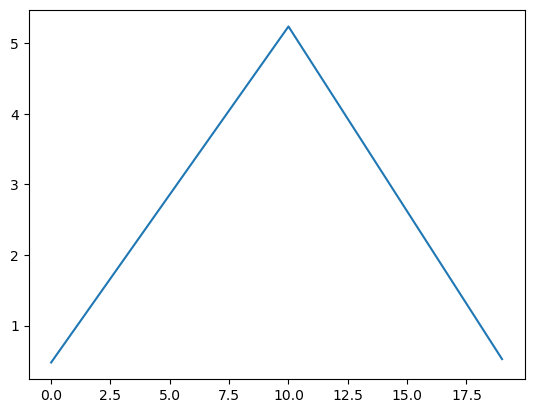

In [5]:
import numpy as np
import scipy.linalg
N = 20
r = np.zeros(N)
r[0] = 2
r[1] = -1
K = scipy.linalg.toeplitz(r)
#print(K)
j = np.zeros(N)
j[N//2] = 1
y = np.linalg.solve(K, j)
import matplotlib.pyplot as plt
plt.plot(y)



array([3.97766165+0.j, 3.91114561+0.j, 3.80193774+0.j, 3.65247755+0.j,
       3.46610374+0.j, 3.2469796 +0.j, 3.        +0.j, 2.73068205+0.j,
       2.44504187+0.j, 2.14946019+0.j, 1.85053981+0.j, 1.55495813+0.j,
       1.26931795+0.j, 0.02233835+0.j, 0.08885439+0.j, 0.19806226+0.j,
       0.34752245+0.j, 0.53389626+0.j, 0.7530204 +0.j, 1.        +0.j])

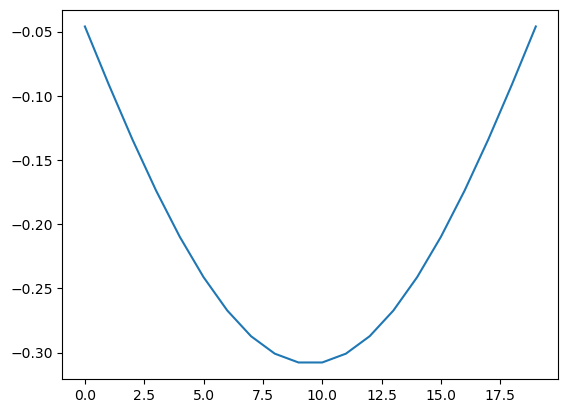

In [30]:
eigvals, evecs = scipy.linalg.eig(K)
plt.plot(evecs[:,13])
eigvals

In [39]:
N = 7
D = np.zeros((N-1, N))
for i in range(N - 1):
    D[i, i] = -1
    D[i, i+1] = 1
D
D @ D.T
D.T @ D

array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.]])

In [67]:
D2 = np.diff(np.eye(N), n=2, axis=0)
x0 = np.zeros(N)
x0[0] = 1
xN = np.zeros(N)
xN[N-1] = 1
L = np.vstack((D2, x0, xN))
#def schur(A, n):
#np.roll(L, (-1,-1), axis=(0,1))
L = np.roll(L, -1, axis=1)
A = L[-2:,-2:]
B = L[:-2,-2:]
C = L[-2:,:-2]
D = L[:-2,:-2]
D - C.T @ np.linalg.solve(A, B.T)

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

Since C is all zeros, not that interesting.
But for inhomogenous solutions, this tells us effective sources.

That this is an assymmetric matrix as compared to K is a huge numerical blow. Symmettric is really good.
Also the rolling fixes how off diagonal the thing is.

Diagonality ought to come immediately from an energy / least squares formulation. min |(Dx)|


We could combinatorially discover the rolling as an optimization problem.
It'll also work for othert boundary conditions

It would be nice to perform manipulations while having knuckledragger confirm what I'm doing.
Abductive inference of minimal preconditions I might need to do certain move.


In [ ]:
# we turned diff into a matrix. This is a general pattern.
def reify(f,N):
    return f(np.eye(N))
# for example linalg.solve reifies into np.inv

In [68]:
C

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
class Kleene():
    zero = None
    one = None
    def __mul__(self, other):
        raise NotImplementedError()
    def __add__(self, other):
        raise NotImplementedError()
    def star(self):
        raise NotImplementedError()
    
class Bool(Kleene):
    def __init__(self, value):
        self.value = value
    def __mul__(self, other):
        return Bool(self.value and other.value)
    def __add__(self, other):
        return Bool(self.value or other.value)
    def star(self):
        return Bool(True)
    def __str__(self):
        return str(self.value)
    def __repr__(self):
        return str(self.value)
